In [1]:
import matplotlib.pyplot as plt
import numpy as np
from enmspring.eigenvector_plot import AtomSeparatePlot, BaseTypeEigenvector
from enmspring.graphs_bigtraj import StackMeanModeAgent
from enmspring.abbr import Abbreviation

rootfolder = '/home/ytcdata/bigtraj_fluctmatch/500ns'

### Part 1: Prepare s-agent

In [2]:
host = 'gcgc_21mer'
interval_time = 500
s_agent = StackMeanModeAgent(host, rootfolder, interval_time)

/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/mean_mode_npy exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/0_500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/250_750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/500_1000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/750_1250/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1000_1500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1250_1750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1500_2000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1750_2250/pd_dfs exists
Read Dataframe of stacking:

In [3]:
s_agent.load_mean_mode_laplacian_from_npy()
s_agent.eigen_decompose()
s_agent.initialize_nodes_information()
s_agent.split_node_list_into_two_strand()
s_agent.set_benchmark_array()
s_agent.set_strand_array()

Load laplacian_mat from /home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/mean_mode_npy/laplacian.npy
Thare are 399 nodes.
Total number of nodes: 399
There are 201 eigenvectors belonging to STRAND1.
There are 198 eigenvectors belonging to STRAND2.
Sum of two strands: 399


### Part 2: Prepare b-agent

In [39]:
base_type = 'G' # 'A', 'T', 'C', 'G'
strand_id = 'STRAND1' # 'STRAND1', 'STRAND2'
b_agent = BaseTypeEigenvector(host, base_type, strand_id, s_agent)

In [40]:
#b_agent.get_d_idx()

### Part 3: Assign the index of eigenvector

In [41]:
eigv_id = 1

strand_id_by_eigv_id = s_agent.decide_eigenvector_strand_by_strand_array(eigv_id)
if strand_id_by_eigv_id != strand_id:
    print('STRAND-ID is not consistent!!!!!')
else:
    print('STRAND-ID is consistent.')

STRAND-ID is consistent.


### Part 4: Plot

In [42]:
figsize = (24, 6)
a_agent = AtomSeparatePlot(host, base_type, figsize)

(-0.323, 0.000)


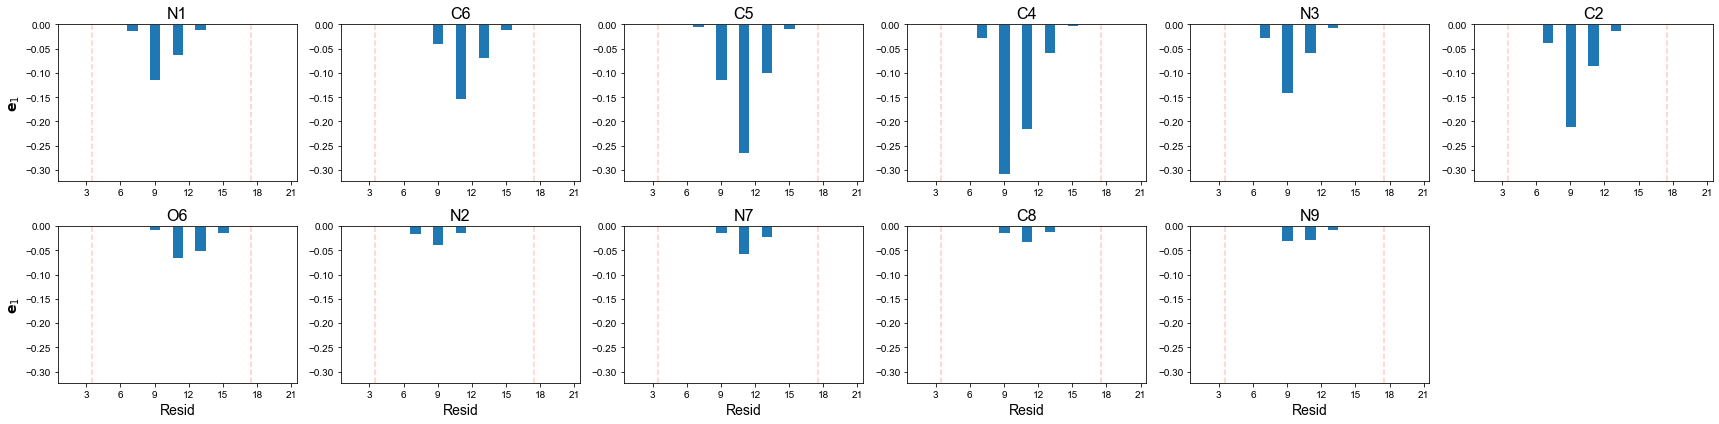

In [44]:
ylims = (-0.323, 0.000) # None or (ymin, ymax)
#ylims = None
fig, axes = a_agent.plot_eigenvector_by_eigv_id(eigv_id, s_agent, b_agent, ylims)
plt.tight_layout()
plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}-{eigv_id}.png', dpi=200, transparent=False)
plt.show()